In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Tamaño del archivo
data.shape

(374, 13)

Comienzo del analisis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
#promedio alto, el dataset no es amplio con respecto a las edades   
data['Age'].std()

8.673133465547243

Empezamos el analisis

In [7]:
# una forma de agregar una columna
data.loc[data['Age'] <= 40, 'Age_group'] = 'Adult'
data.loc[data['Age'] >= 41, 'Age_group'] = 'Older Adult'

In [8]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Adult
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult


In [9]:
# Denotamos el mayor numero de adultos mayores
data['Age_group'].value_counts()

Age_group
Older Adult    209
Adult          165
Name: count, dtype: int64

In [10]:
# Agrupamos por genero + edad para sacar la media y la desviacion estandar 
data.groupby('Gender')['Age'].agg(['mean', 'std']).round(2)

,mean,std
Gender,,
Female,47.41,8.09
Male,37.07,5.66


In [26]:
# Agrupamos la ocupacion + genero
agr = data.groupby('Occupation')['Gender'].value_counts()
print(agr)


Occupation            Gender
Accountant            Female    36
                      Male       1
Doctor                Male      69
                      Female     2
Engineer              Female    32
                      Male      31
Lawyer                Male      45
                      Female     2
Manager               Female     1
Nurse                 Female    73
Sales Representative  Male       2
Salesperson           Male      32
Scientist             Female     4
Software Engineer     Male       4
Teacher               Female    35
                      Male       5
Name: count, dtype: int64


In [29]:
# Agrupamos por genero la duracion y cantidad sacando su media
mean_ge_sd_qs = data.groupby('Gender')[['Sleep Duration','Quality of Sleep']].mean().round(decimals=2)
print(mean_ge_sd_qs)

        Sleep Duration  Quality of Sleep
Gender                                  
Female            7.23              7.66
Male              7.04              6.97


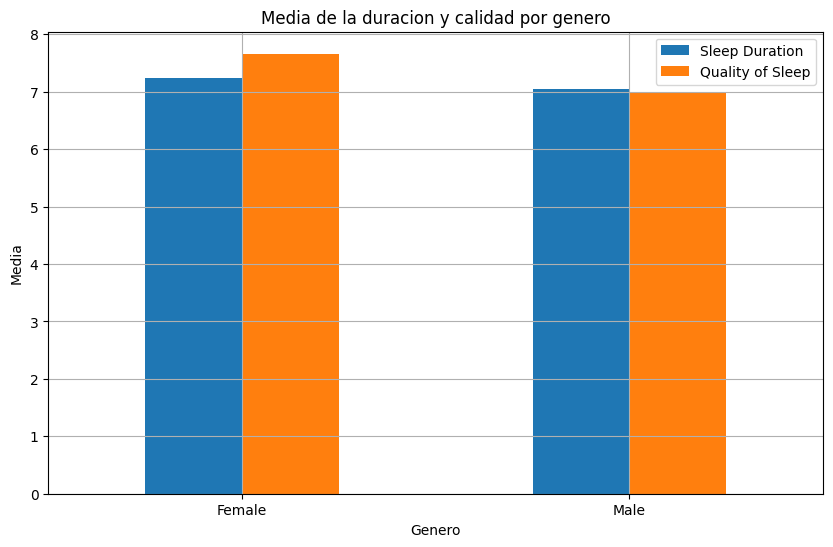

In [44]:
# Grafica
mean_ge_sd_qs.plot(kind='bar', figsize=(10,6))

plt.title('Media de la duracion y calidad por genero')
plt.xlabel('Genero')
plt.ylabel('Media')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()

In [13]:
#agrupamos por Ocupacion & ordenamos por calidad de suelo 
occ_qua = data.groupby('Occupation')[['Sleep Duration','Quality of Sleep']].mean().round(2)
occ_qua.sort_values('Quality of Sleep', ascending=False)

,Sleep Duration,Quality of Sleep
Occupation,,
Engineer,7.99,8.41
Accountant,7.11,7.89
Lawyer,7.41,7.89
Nurse,7.06,7.37
Manager,6.90,7.00
Teacher,6.69,6.98
Doctor,6.97,6.65
Software Engineer,6.75,6.50
Salesperson,6.40,6.00


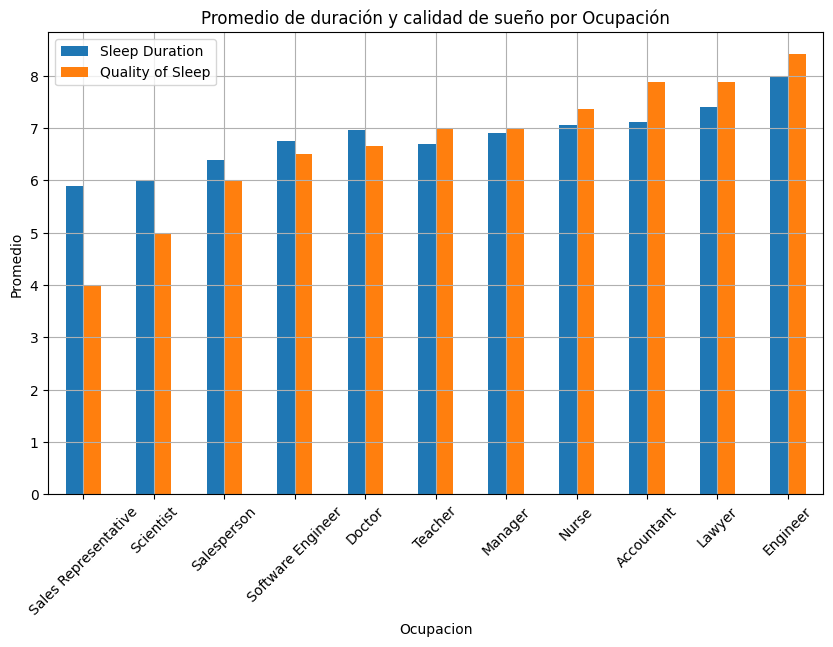

In [53]:
mean_occ_sd_qs = occ_qua.sort_values('Quality of Sleep')
mean_occ_sd_qs.plot(kind='bar', figsize=(10,6))

plt.title('Promedio de duración y calidad de sueño por Ocupación')
plt.xlabel('Ocupacion')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [54]:
# 
occ_stress = data.groupby('Occupation')[['Stress Level', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)
occ_stress.sort_values('Stress Level', ascending=False)

,Stress Level,Sleep Duration,Quality of Sleep
Occupation,,,
Sales Representative,8.00,5.90,4.00
Salesperson,7.00,6.40,6.00
Scientist,7.00,6.00,5.00
Doctor,6.73,6.97,6.65
Software Engineer,6.00,6.75,6.50
Nurse,5.55,7.06,7.37
Lawyer,5.06,7.41,7.89
Manager,5.00,6.90,7.00
Accountant,4.59,7.11,7.89


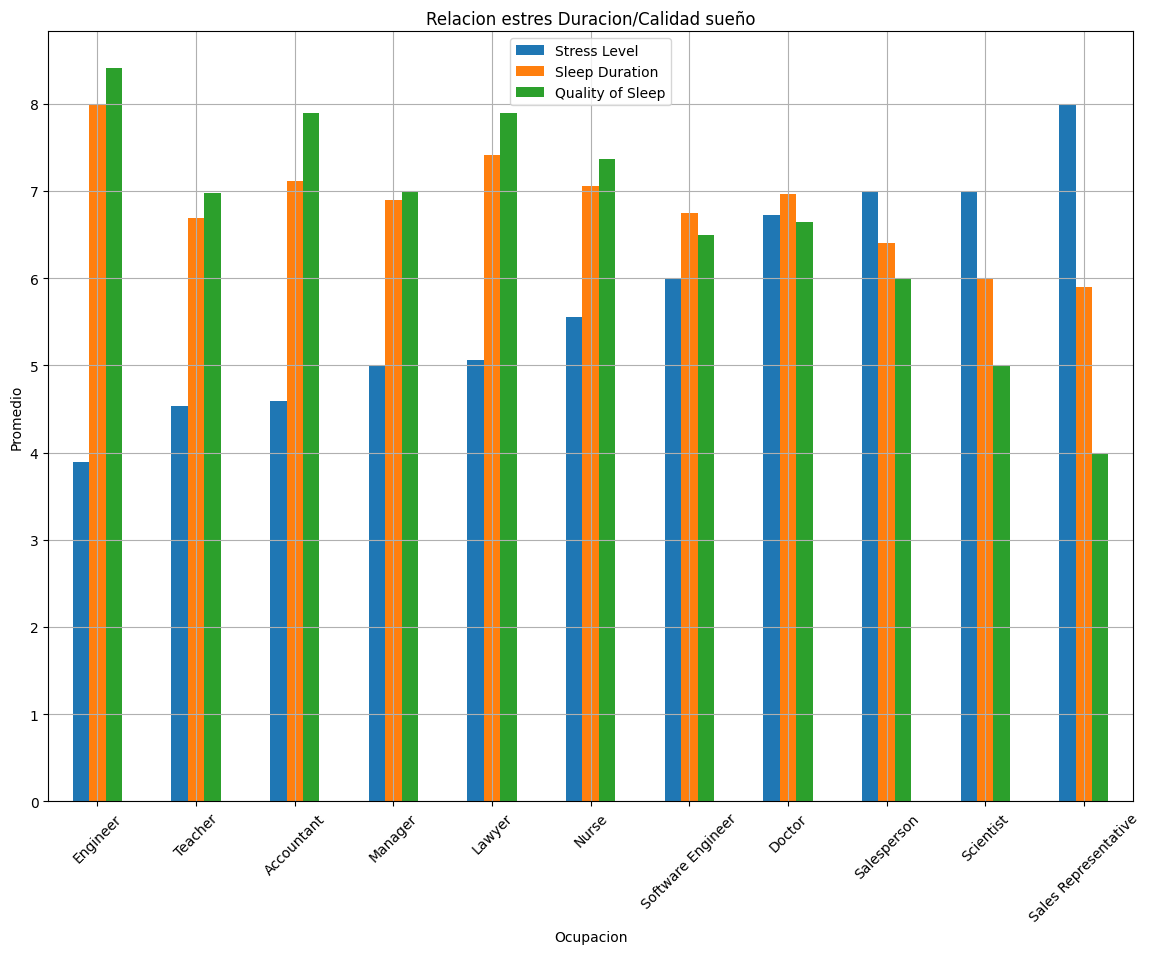

In [65]:
agr_st = occ_stress.sort_values('Stress Level')
agr_st.plot(kind='bar', figsize=(14,10))

plt.title('Relacion estres Duracion/Calidad sueño')
plt.xlabel('Ocupacion')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.grid(True)



plt.show()

In [15]:
occ_BMi = data.groupby('Occupation')['BMI Category'].value_counts()
occ_BMi.sort_values(ascending=False)

Occupation            BMI Category 
Nurse                 Overweight       66
Doctor                Normal           65
Engineer              Normal           56
Lawyer                Normal           42
Teacher               Overweight       33
Salesperson           Overweight       32
Accountant            Normal           26
Nurse                 Normal Weight     7
Accountant            Overweight        6
Teacher               Normal            6
Accountant            Normal Weight     5
Engineer              Normal Weight     4
Doctor                Obese             4
Scientist             Overweight        4
Engineer              Overweight        3
Doctor                Normal Weight     2
Lawyer                Overweight        2
Sales Representative  Obese             2
Software Engineer     Normal Weight     2
Lawyer                Obese             2
Software Engineer     Overweight        1
Lawyer                Normal Weight     1
Software Engineer     Obese             

In [16]:
occ_steps = data.groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)
occ_steps.sort_values('Quality of Sleep' ,ascending=False)

,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Engineer,5980.95,51.86,7.99,8.41
Accountant,6881.08,58.11,7.11,7.89
Lawyer,7661.70,70.43,7.41,7.89
Nurse,8057.53,78.59,7.06,7.37
Manager,5500.00,55.00,6.90,7.00
Teacher,5957.50,45.62,6.69,6.98
Doctor,6808.45,55.35,6.97,6.65
Software Engineer,5800.00,48.00,6.75,6.50
Salesperson,6000.00,45.00,6.40,6.00
